In [0]:
import pyspark.sql.functions as F
from pyspark.sql.functions import col
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession 

spark = (SparkSession.builder.appName("Spaceship Titanic").config('spark.sql.repl.eagerEval.enabled', True).getOrCreate())

## Explorando os Dados


### Descrição

|Variavel| Descrição|
|--------|-----------|
|PassengerId| A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.|
|HomePlanet| The planet the passenger departed from, typically their planet of permanent residence.|
|CryoSleep | Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.|
|Cabin | The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.|
|Destination | The planet the passenger will be debarking to.|
|Age | The age of the passenger.|
|VIP | Whether the passenger has paid for special VIP service during the voyage.|
|RoomService, FoodCourt, ShoppingMall, Spa, VRDeck | Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.|
|Name | The first and last names of the passenger.|
|Transported | Whether the passenger was transported to another dimension. Target.|

In [0]:
df = spark.sql('select * from spaceship_titanic')
df = df.toPandas()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float32
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float32
 8   FoodCourt     8510 non-null   float32
 9   ShoppingMall  8485 non-null   float32
 10  Spa           8510 non-null   float32
 11  VRDeck        8505 non-null   float32
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float32(6), object(7)
memory usage: 687.8+ KB


In [0]:
porc_nulos = (df.isnull().sum()/df.count()).sort_values(ascending = False) 
porc_nulos2 = porc_nulos.map(lambda x: "{:.2%}".format(x))
print(porc_nulos2)

CryoSleep       2.56%
ShoppingMall    2.45%
VIP             2.39%
HomePlanet      2.37%
Name            2.35%
Cabin           2.34%
VRDeck          2.21%
FoodCourt       2.15%
Spa             2.15%
Destination     2.14%
RoomService     2.13%
Age             2.10%
PassengerId     0.00%
Transported     0.00%
dtype: object


In [0]:
df['CryoSleep_num'] = df['CryoSleep'].replace({True:1, False:0})
df['VIP_num'] = df['VIP'].replace({True:1, False:0})
df['target'] = df['Transported'].replace({True:1, False:0})
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CryoSleep_num,VIP_num,target
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0.0,0.0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0.0,1.0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0.0,0.0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0.0,1.0,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1.0,0.0,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0.0,0.0,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0.0,0.0,0


In [0]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_num,VIP_num,target
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8476.000000,8490.000000,8693.000000
mean,28.827930,224.687622,458.077209,173.729172,311.138763,304.854797,0.358306,0.023439,0.503624
std,14.489021,666.717712,1611.489258,604.696472,1136.705566,1145.717163,0.479531,0.151303,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000,0.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1.000000


## Funções auxiliares: 

In [0]:
def graf_barras(variavel,df):
    df_aux = df.fillna('Sem Info').groupby(variavel, dropna = False).count().reset_index().sort_values(by='PassengerId')
    df_aux[variavel] = df_aux[variavel].astype(str)
    plt.bar(df_aux[variavel], df_aux['PassengerId'])
    plt.ylabel = 'Quantidade de Passageiros'
    plt.xlabel = variavel
    # plt.title('Quantidade de passageiros que elegeram ou não o CryoSleep')
    lista_qtd = df_aux['PassengerId'].tolist()

    for i, quantidade in enumerate(lista_qtd):    
        plt.annotate(str(quantidade), xy = (i, quantidade), ha = 'center', va = 'bottom')
    return plt.show()

In [0]:
def graf_stack(variavel, df):
    df_aux = df.fillna('Sem Info').groupby(variavel, dropna = False).count().reset_index().sort_values(by='PassengerId')
    valores = df_aux[[variavel, 'PassengerId']]
    valores['Porcentagem'] = (valores['PassengerId'] / valores['PassengerId'].sum())
    # valores['Porcentagem'] = valores['Porcentagem'].map(lambda x: '{:.2%}'.format(x))
    valores = valores[[variavel, 'Porcentagem']]
    fig, ax = plt.subplots()
    valores.set_index(variavel).T.plot(kind='bar', stacked=True, ax=ax)
    # plt.title('Porcentagem de passageiros que elegeram ou não o CryoSleep - Soma 100%')
    return plt.show()

In [0]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df): 
    df = pd.concat([df[discrete_variable_name],df[good_bad_variable_df]],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']*df['n_obs']
    df['n_bad'] = (1-df['prop_good'])*df['n_obs']
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df


def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df): 
    df = pd.concat([df[discrete_variable_name],df[good_bad_variable_df]],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']*df['n_obs']
    df['n_bad'] = (1-df['prop_good'])*df['n_obs']
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [0]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:,0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18,6))
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel = df_WoE.columns[0]
    plt.ylabel = 'Weight of Evidence'
    plt.title(str('weight of Evidence by '+ df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

## Pré processamento 

In [0]:
#Dividindo a variável cabin em 3 variáveis: deck/num/side

df[['deck', 'num', 'side']] = df['Cabin'].str.split('/', expand = True)
df_cabin = df[['PassengerId','deck', 'num', 'side']]
(df_cabin.groupby('deck').count())['PassengerId']
print('----Deck: ')
print( df_cabin['deck'].describe())
print()
print('----Num: ')
print( df_cabin['num'].describe())
print()
print('----Side: ')
print( df_cabin['side'].describe())

----Deck: 
count     8494
unique       8
top          F
freq      2794
Name: deck, dtype: object

----Num: 
count     8494
unique    1817
top         82
freq        28
Name: num, dtype: object

----Side: 
count     8494
unique       2
top          S
freq      4288
Name: side, dtype: object


### CryoSleep
Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

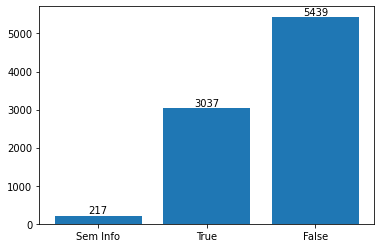

In [0]:
graf_barras('CryoSleep', df)
    

## VIP
Whether the passenger has paid for special VIP service during the voyage.


<command-1201796995892757>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores['Porcentagem'] = (valores['PassengerId'] / valores['PassengerId'].sum())


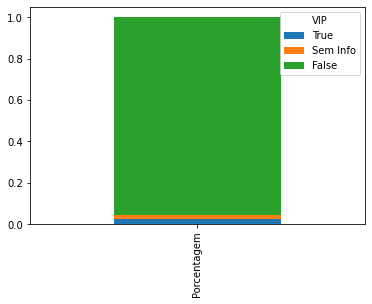

In [0]:
graf_stack('VIP', df)


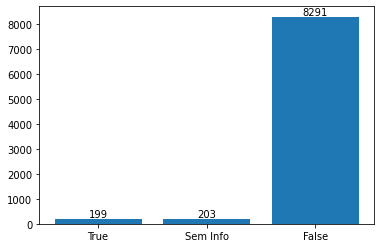

In [0]:
graf_barras('VIP',df)

## HomePlanet
The planet the passenger departed from, typically their planet of permanent residence.

<command-1201796995892757>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores['Porcentagem'] = (valores['PassengerId'] / valores['PassengerId'].sum())


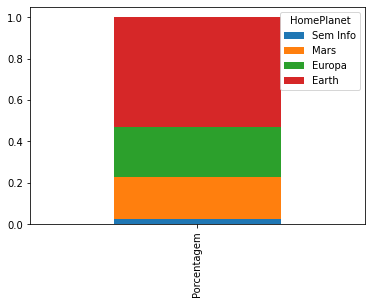

In [0]:
graf_stack('HomePlanet', df)

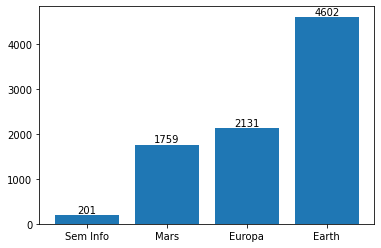

In [0]:
graf_barras('HomePlanet',df)

## Destination
The planet the passenger will be debarking to.

<command-1201796995892757>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores['Porcentagem'] = (valores['PassengerId'] / valores['PassengerId'].sum())


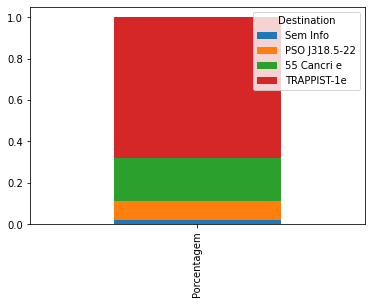

In [0]:
graf_stack('Destination', df)

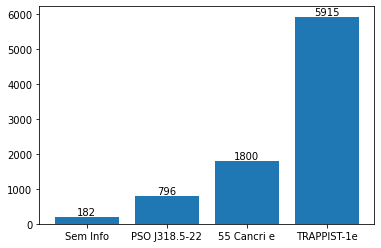

In [0]:
graf_barras('Destination',df)

## Transported
Whether the passenger was transported to another dimension.

<command-1201796995892757>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores['Porcentagem'] = (valores['PassengerId'] / valores['PassengerId'].sum())


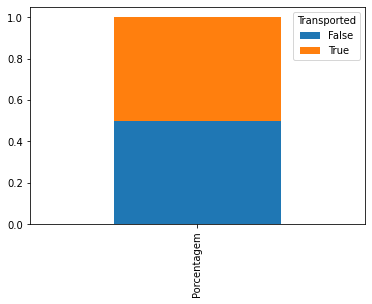

In [0]:
graf_stack('Transported', df)

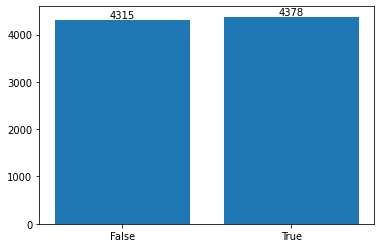

In [0]:
graf_barras('Transported',df)

##Cabin
The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

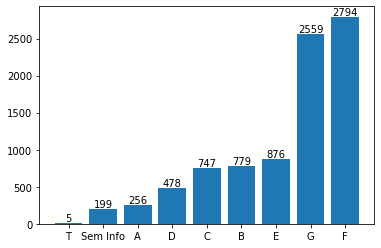

In [0]:
graf_barras('deck', df_aux)

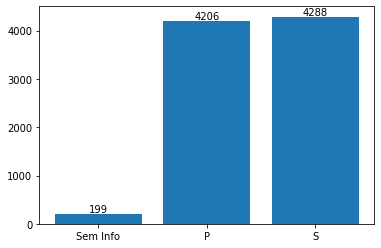

In [0]:
graf_barras('side', df_aux)

#Rascunhos

In [0]:
df_aux['Age_agg'] = pd.cut(df_aux['Age'],16)

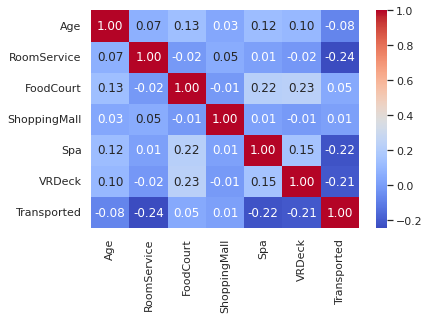

In [0]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Visualizar a matriz de correlação usando um mapa de calor (opcional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()